# Severity of Airplane Accindent

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
os.getcwd()

'/home/saurav/Desktop/self/kaggle/Airline/dataset'

In [3]:
sample_submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test.csv",index_col='Accident_ID')
train = pd.read_csv("train.csv",index_col='Accident_ID')

In [5]:
train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


In [4]:
train.head()


,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [7]:
train['Severity'].replace('Minor_Damage_And_Injuries',0,inplace=True)
train['Severity'].replace('Significant_Damage_And_Fatalities',1,inplace=True)
train['Severity'].replace('Significant_Damage_And_Serious_Injuries',2,inplace=True)
train['Severity'].replace('Highly_Fatal_And_Damaging',3,inplace=True)

In [8]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,0,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,1,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,1,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [9]:
train['Severity'].value_counts()

3    3049
2    2729
0    2527
1    1695
Name: Severity, dtype: int64

In [20]:
# Normalise can be set to true to print the proportions instead of Numbers.
train['Severity'].value_counts(normalize=True)

3    0.3049
2    0.2729
0    0.2527
1    0.1695
Name: Severity, dtype: float64

In [14]:
x_train = train.drop('Severity',axis=1)
y_train = train['Severity']

In [17]:
features = x_train.columns
features

Index([u'Safety_Score', u'Days_Since_Inspection', u'Total_Safety_Complaints',
       u'Control_Metric', u'Turbulence_In_gforces', u'Cabin_Temperature',
       u'Accident_Type_Code', u'Max_Elevation', u'Violations',
       u'Adverse_Weather_Metric'],
      dtype='object')

Draw Distribution Plots

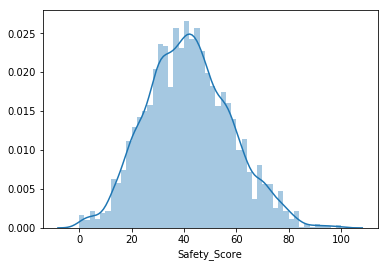

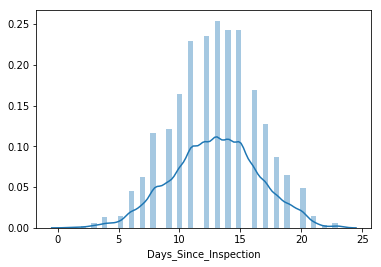

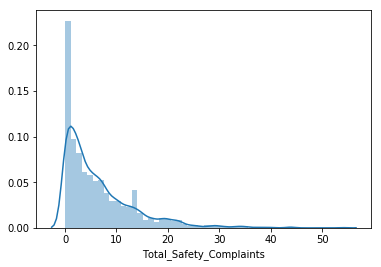

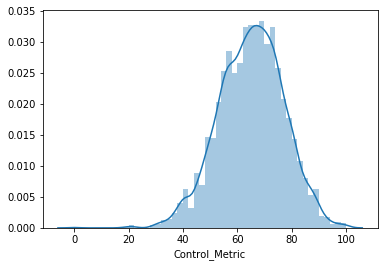

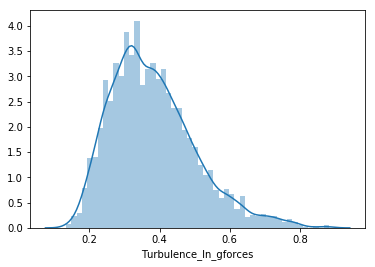

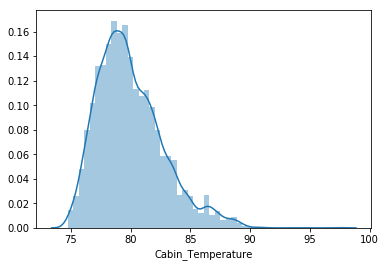

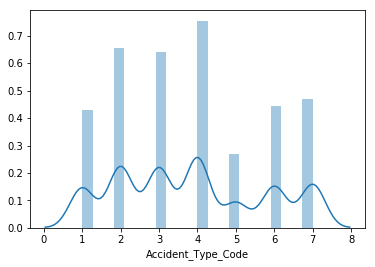

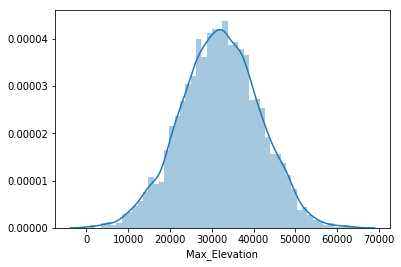

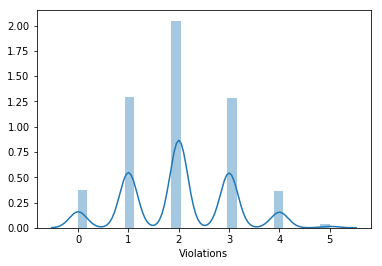

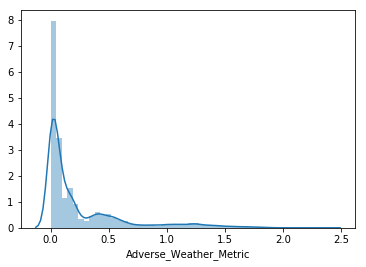

In [18]:
for col in features:
    sns.distplot(x_train[col])
    plt.show()

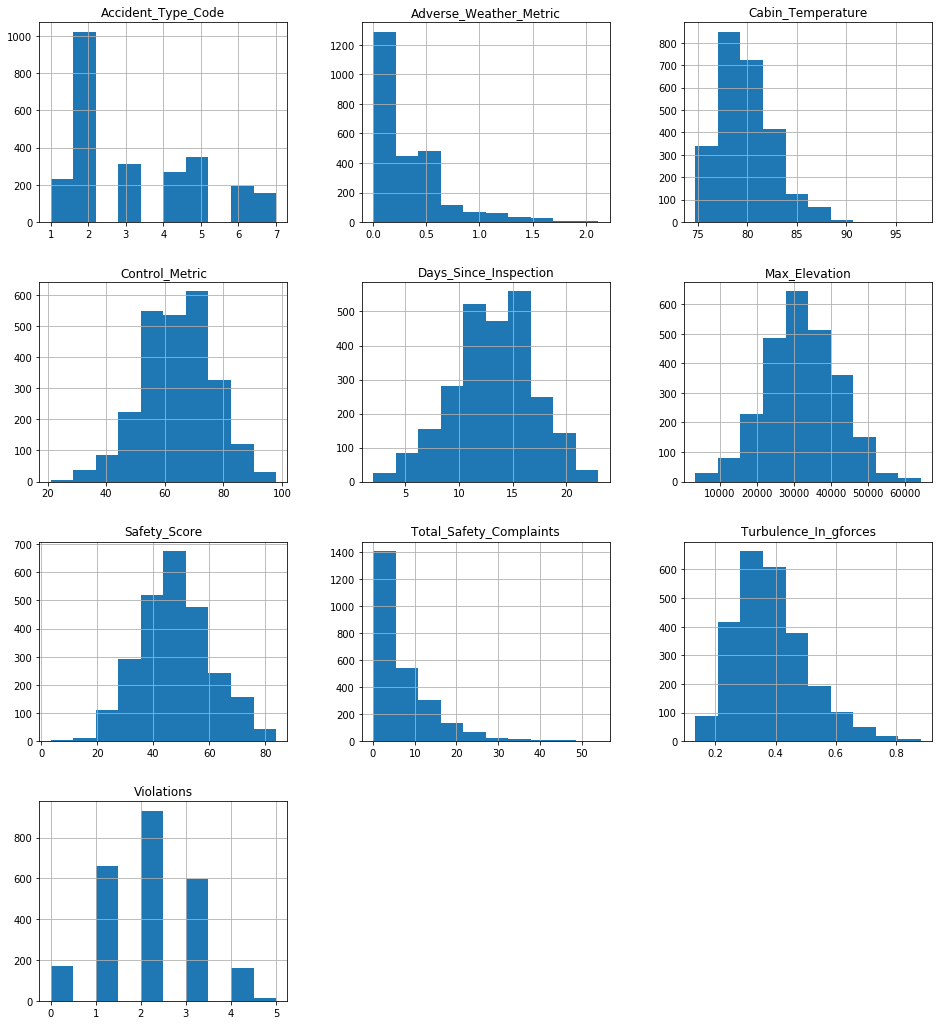

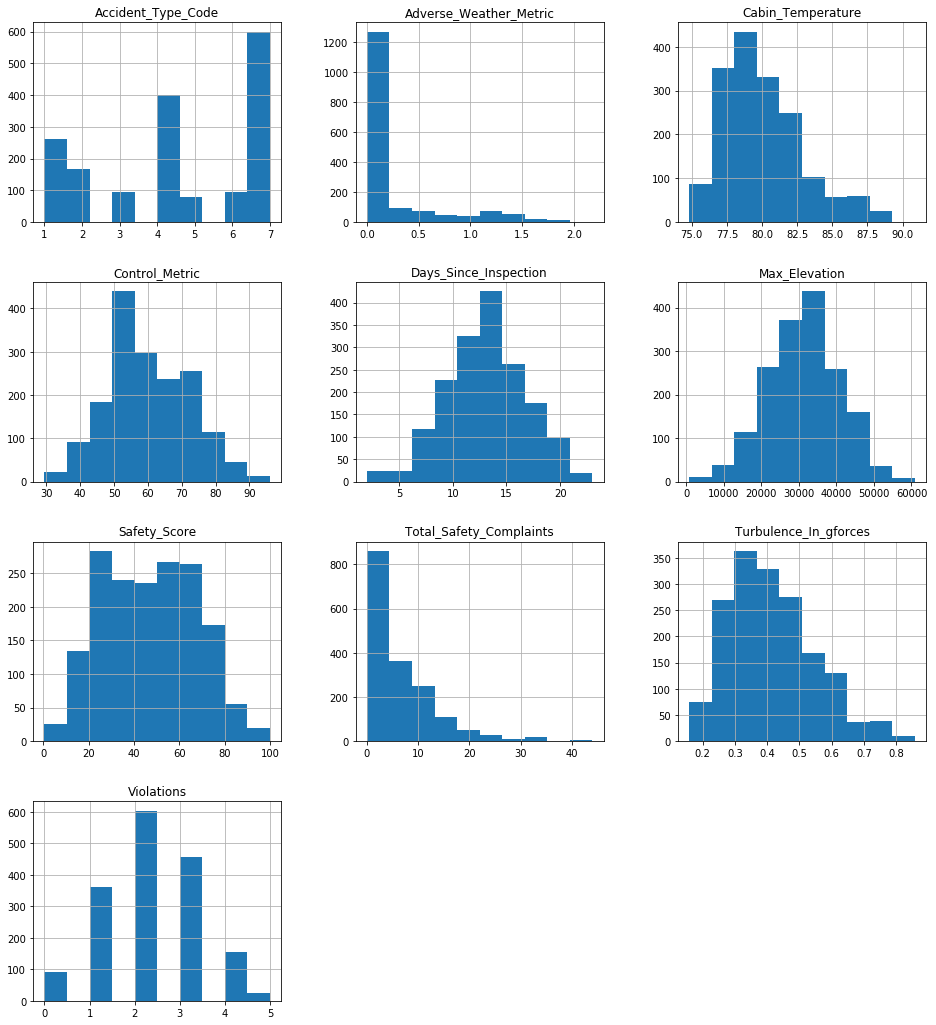

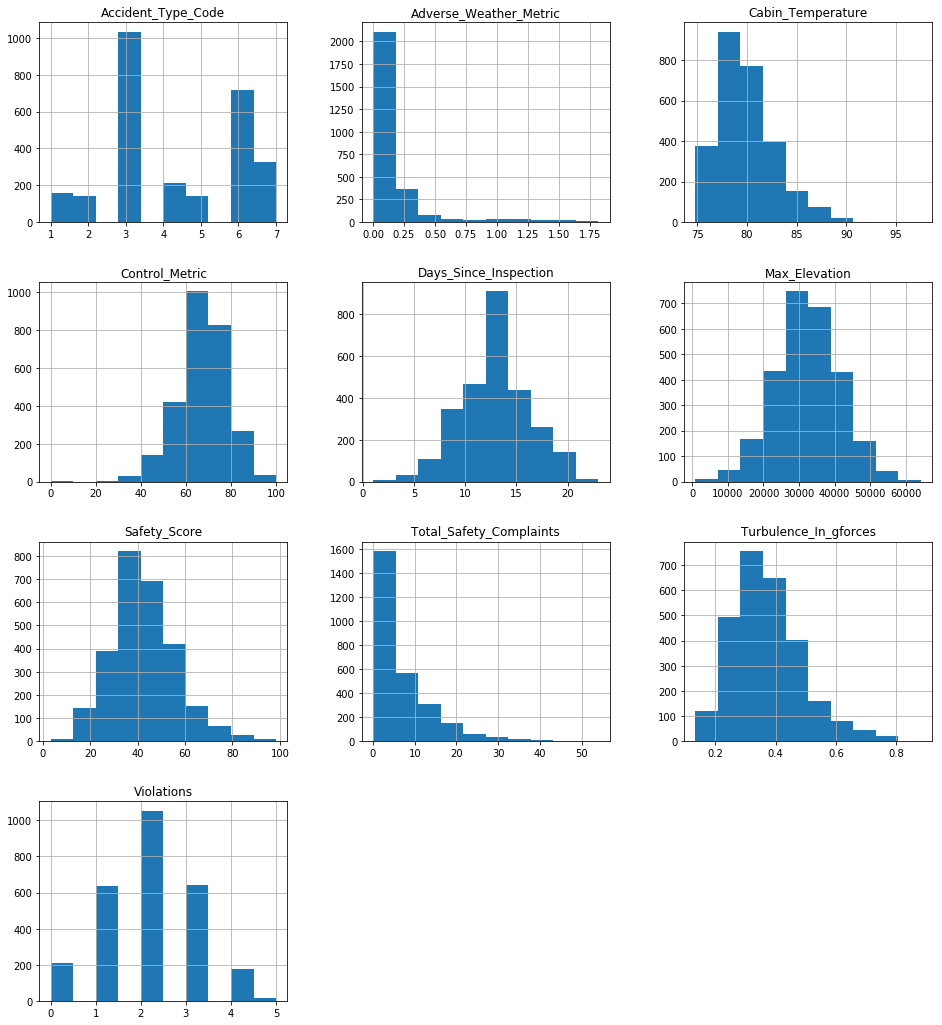

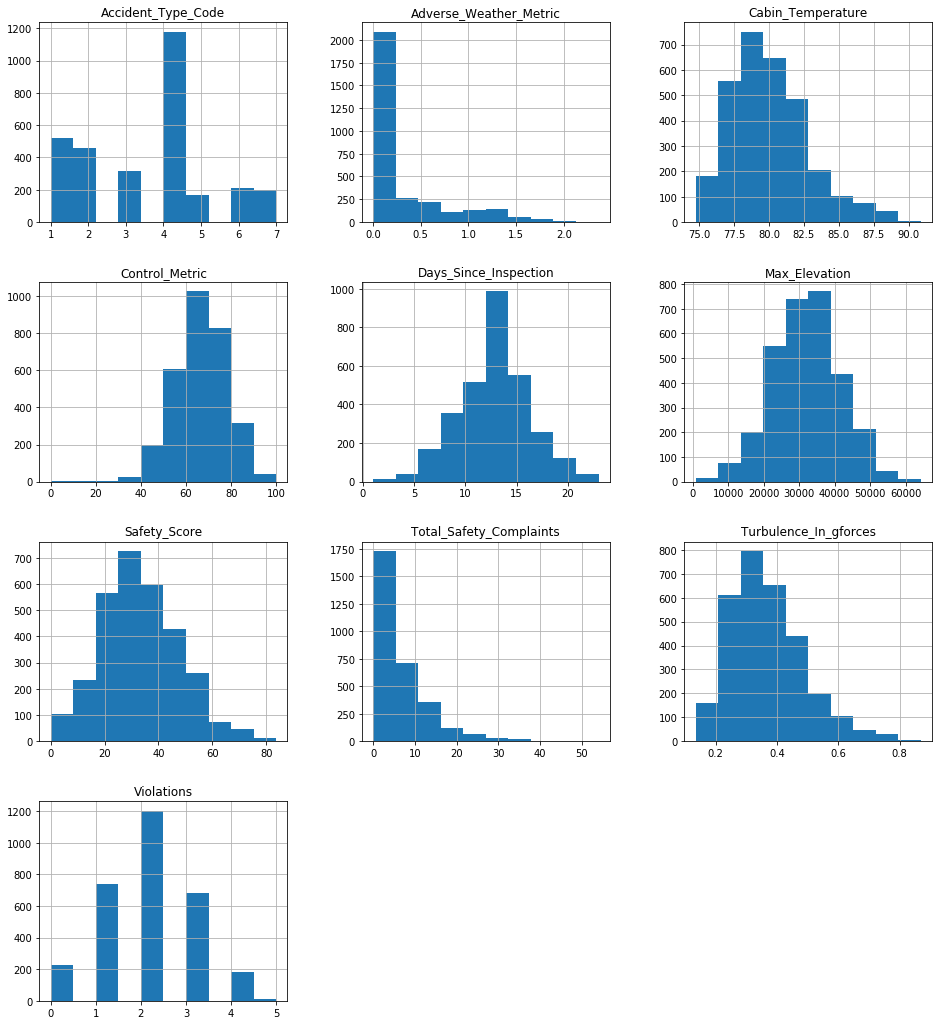

In [25]:
plots = train.groupby('Severity').hist(figsize = (16,18))

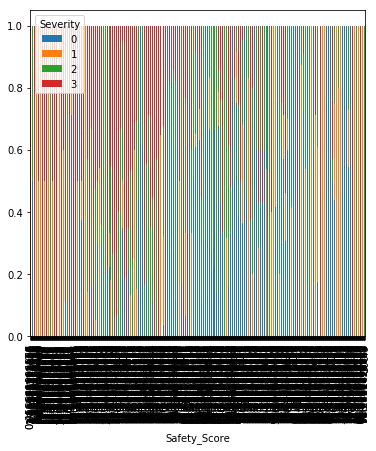

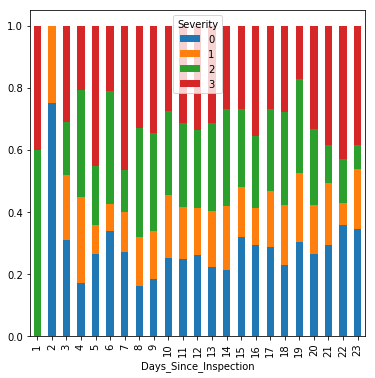

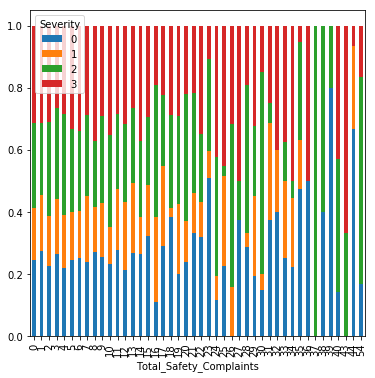

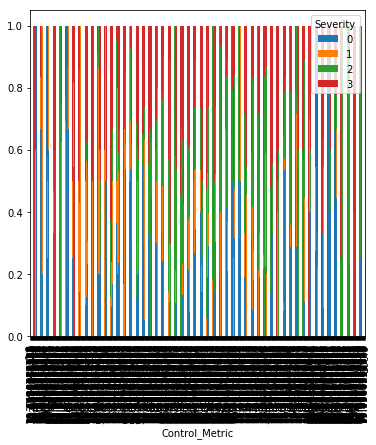

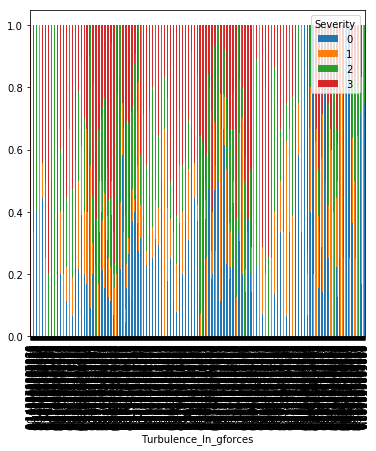

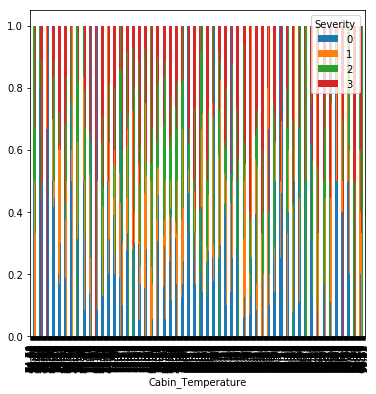

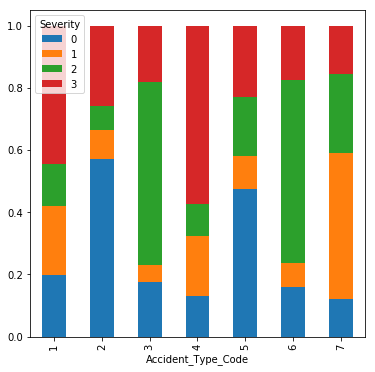

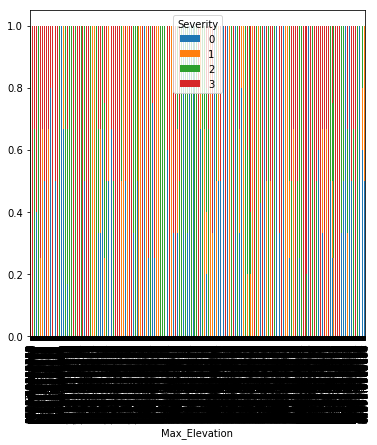

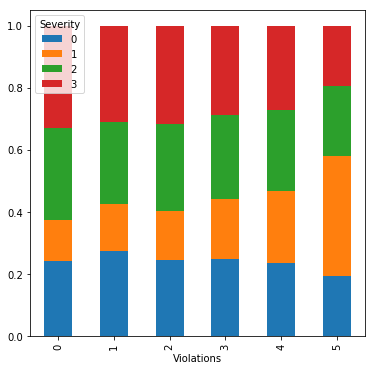

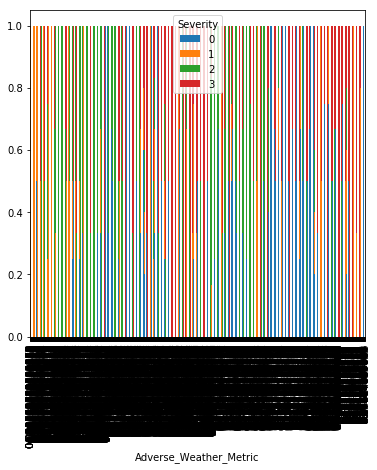

In [28]:
for col in features:
    col_plot=pd.crosstab(train[col],train['Severity'])
    col_plot.div(col_plot.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
